<a href="https://colab.research.google.com/github/majorquev/Introduccion_a_ciencia_de_datos_R_v2/blob/main/Clases/Clase2/Clase2_01_manipulacion_de_tablas_I_desarrollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 2: Manipulación de tablas en R (Parte I)


**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales Méndez<br>
**E-mail ayudante:** rumorale1@gmail.com

## 1. Instalación de librerías

En esta sección aprenderemos a realizar operaciones simples de manipulación de tablas en R. Para ello trabajaremos con la librería _dplyr_, la cual cuenta con una gran variedad de funciones para manipular tablas, entre otras.


Una manera de instalar librerías en R es me diante la función `install.packages()`, la cual recibe como argunmento principal el nombre (enre comillas) de la librería que se desea cargar.

Una vez instalada la librería la debemos cargar en la sesión de trbajao, para lo cual podemos utilizar la función `library()` la cual recibe como argumento el nombre de la librería que se quiere cargar.


In [1]:
# 1. Instalación de package
# install.packages("dplyr") # No instalaremos la librería pues ya viene cargada en los notebooks de azure.Probablemente sea necesario hacerlo en su entorno local.
# Para cargar la librería
library("dplyr") # sin comillas también funciona


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## 2. Funciones básicas en dplyr

En todo proyecto analítico es necesario procesar, limpar y unificar disntintas fuentes de información para poder generar los análisis requeridos. Para dichas tareas, en la librería _dplyr_ contamos con funciones que nos permitirán filtrar datos, crear columnas, agrupar tablas, y cruzar tablas.

A continuación trabajaremos con la siguientes funciones:<br>

   `filter()`                        : Para filtrar los datos (por filas).<br>
   `arrange()`                       : Para ordenar un dataset.<br>
   `select()`                        : Para seleccionar y renombrar columnas.<br>
   `mutate()`                        : Para crear (o modificar) nuevas columnas basadas en columnas existentes.<br>
   `group_by()`                     : Para agrupar tablas.<br>
   `sample_n()` and `sample_frac()`  : Para generar muestras aleatorias<br>
   
   
Para entender el funcionamiento de estas funciones trabjaremos con el set de datos _nycflights13_, el cual contiene la información de los vuelos con salida en los aeropuertos de Nueva York en el año 2013.

## 3. Carga de datos

En R es posible cargar datos provenientes de archivos de texto plano. Un ejemplo de ellos son los de extensión *.csv (comma separated values). Para cargar los datos a la sesión, lo podemos realizar a través de la función `read.csv()`, la cual recibe como argumento principal la ruta del archivo a cargar.

   
   
   

In [2]:
getwd()

[1] "/content"

In [4]:
# Carga de datos ------
# Usaremos la función read.csv para cargar los archivos.

aeropuertos <- read.csv("Datasets_airports.csv")
head(aeropuertos)


,faa,name,lat,lon,alt,tz,dst,tzone
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>
1,04G,Lansdowne Airport,41.13047,-80.61958,1044,-5,A,America/New_York
2,06A,Moton Field Municipal Airport,32.46057,-85.68003,264,-6,A,America/Chicago
3,06C,Schaumburg Regional,41.98934,-88.10124,801,-6,A,America/Chicago
4,06N,Randall Airport,41.43191,-74.39156,523,-5,A,America/New_York
5,09J,Jekyll Island Airport,31.07447,-81.42778,11,-5,A,America/New_York
6,0A9,Elizabethton Municipal Airport,36.37122,-82.17342,1593,-5,A,America/New_York


In [ ]:
ejemplo <- read.csv("sample_data/mnist_test.csv") # otro ejemplo

In [9]:
vuelos <- read.csv("https://raw.githubusercontent.com/majorquev/Introduccion_a_ciencia_de_datos_R_v2/main/Clases/Clase2/Datasets/Datasets_flights.csv")



In [10]:
# Podemos inspeccionar los datos cargados
# Para ello son de utilidad las funciones head() y summary()
head(vuelos)

# ¿Cuántos registros tienen las tablas?



,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
1,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
6,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [11]:
summary(vuelos)

      year          month             day           dep_time    sched_dep_time
 Min.   :2013   Min.   : 1.000   Min.   : 1.00   Min.   :   1   Min.   : 106  
 1st Qu.:2013   1st Qu.: 4.000   1st Qu.: 8.00   1st Qu.: 907   1st Qu.: 906  
 Median :2013   Median : 7.000   Median :16.00   Median :1401   Median :1359  
 Mean   :2013   Mean   : 6.549   Mean   :15.71   Mean   :1349   Mean   :1344  
 3rd Qu.:2013   3rd Qu.:10.000   3rd Qu.:23.00   3rd Qu.:1744   3rd Qu.:1729  
 Max.   :2013   Max.   :12.000   Max.   :31.00   Max.   :2400   Max.   :2359  
                                                 NA's   :8255                 
   dep_delay          arr_time    sched_arr_time   arr_delay       
 Min.   : -43.00   Min.   :   1   Min.   :   1   Min.   : -86.000  
 1st Qu.:  -5.00   1st Qu.:1104   1st Qu.:1124   1st Qu.: -17.000  
 Median :  -2.00   Median :1535   Median :1556   Median :  -5.000  
 Mean   :  12.64   Mean   :1502   Mean   :1536   Mean   :   6.895  
 3rd Qu.:  11.00   3rd Qu.:1

In [12]:
#glimpse() o str()
str(vuelos)

'data.frame':	336776 obs. of  19 variables:
 $ year          : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ day           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ dep_time      : int  517 533 542 544 554 554 555 557 557 558 ...
 $ sched_dep_time: int  515 529 540 545 600 558 600 600 600 600 ...
 $ dep_delay     : int  2 4 2 -1 -6 -4 -5 -3 -3 -2 ...
 $ arr_time      : int  830 850 923 1004 812 740 913 709 838 753 ...
 $ sched_arr_time: int  819 830 850 1022 837 728 854 723 846 745 ...
 $ arr_delay     : int  11 20 33 -18 -25 12 19 -14 -8 8 ...
 $ carrier       : chr  "UA" "UA" "AA" "B6" ...
 $ flight        : int  1545 1714 1141 725 461 1696 507 5708 79 301 ...
 $ tailnum       : chr  "N14228" "N24211" "N619AA" "N804JB" ...
 $ origin        : chr  "EWR" "LGA" "JFK" "JFK" ...
 $ dest          : chr  "IAH" "IAH" "MIA" "BQN" ...
 $ air_time      : int  227 227 160 183 116 150 158 53 140 138 ...
 $ distance      : int  1400 1416 1089

## 4. Funciones básicas de dplyr

A continuación exploraremos los datos de vuelos utilizando la librería dplyr.

### 4.1 Función filter()

La función filter() de dplyr es el equivalente a la sentencia where de sql.

In [13]:
# filter() # where de sql----------------------------------------------------------------
# Registros que tengan fecha 31 de diciembre
# Antes
vuelos[vuelos$year == 2013 & vuelos$month == 12 & vuelos$day == 31,]



,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
110521,2013,12,31,13,2359,14,439,437,2,B6,839,N566JB,JFK,BQN,189,1576,23,59,2013-12-31 23:00:00
110522,2013,12,31,18,2359,19,449,444,5,DL,412,N713TW,JFK,SJU,192,1598,23,59,2013-12-31 23:00:00
110523,2013,12,31,26,2245,101,129,2353,96,B6,108,N374JB,JFK,PWM,50,273,22,45,2013-12-31 22:00:00
110524,2013,12,31,459,500,-1,655,651,4,US,1895,N557UW,EWR,CLT,95,529,5,0,2013-12-31 05:00:00
110525,2013,12,31,514,515,-1,814,812,2,UA,700,N470UA,EWR,IAH,223,1400,5,15,2013-12-31 05:00:00
110526,2013,12,31,549,551,-2,925,900,25,UA,274,N577UA,EWR,LAX,346,2454,5,51,2013-12-31 05:00:00
110527,2013,12,31,550,600,-10,725,745,-20,AA,301,N3CXAA,LGA,ORD,127,733,6,0,2013-12-31 06:00:00
110528,2013,12,31,552,600,-8,811,826,-15,EV,3825,N14916,EWR,IND,118,645,6,0,2013-12-31 06:00:00
110529,2013,12,31,553,600,-7,741,754,-13,DL,731,N333NB,LGA,DTW,86,502,6,0,2013-12-31 06:00:00


In [14]:
# Ahora
filter(vuelos, year == 2013 & month == 12 & day == 31) # filter(data, condicion)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
2013,12,31,13,2359,14,439,437,2,B6,839,N566JB,JFK,BQN,189,1576,23,59,2013-12-31 23:00:00
2013,12,31,18,2359,19,449,444,5,DL,412,N713TW,JFK,SJU,192,1598,23,59,2013-12-31 23:00:00
2013,12,31,26,2245,101,129,2353,96,B6,108,N374JB,JFK,PWM,50,273,22,45,2013-12-31 22:00:00
2013,12,31,459,500,-1,655,651,4,US,1895,N557UW,EWR,CLT,95,529,5,0,2013-12-31 05:00:00
2013,12,31,514,515,-1,814,812,2,UA,700,N470UA,EWR,IAH,223,1400,5,15,2013-12-31 05:00:00
2013,12,31,549,551,-2,925,900,25,UA,274,N577UA,EWR,LAX,346,2454,5,51,2013-12-31 05:00:00
2013,12,31,550,600,-10,725,745,-20,AA,301,N3CXAA,LGA,ORD,127,733,6,0,2013-12-31 06:00:00
2013,12,31,552,600,-8,811,826,-15,EV,3825,N14916,EWR,IND,118,645,6,0,2013-12-31 06:00:00
2013,12,31,553,600,-7,741,754,-13,DL,731,N333NB,LGA,DTW,86,502,6,0,2013-12-31 06:00:00


### 4.2 Función count()

Como su nombre lo indica, esta función nos permite contar registros de una tabla. Es de suma utilidad cuando se utiliza dentro de agrupaciones de tablas. Estas últimas las veremos más adelante. 

Alternativamente, en la librería _dplyr_, contamos con la función `N()` la cual también retorna el conteo de registros.

In [15]:
# count() y N() ----------------------------------------------------------------
# ¿Cuántos vuelos tuvieron como origen el aeropuerto JFK (John F. Kennedy) ?

# OP 1:
count(vuelos, origin)
# En el JFK se registraron 111279 vuelos.

origin,n
<chr>,<int>
EWR,120835
JFK,111279
LGA,104662


In [16]:
# OP 2:
filter(count(vuelos, origin), origin == "JFK")

origin,n
<chr>,<int>
JFK,111279


In [17]:
# OP: 3
conteo1 <- count(vuelos, origin)

In [18]:
filter(conteo1, origin == "JFK")

# OP 3.1:
conteo1[conteo1$origin == "JFK",]


origin,n
<chr>,<int>
JFK,111279


,origin,n
,<chr>,<int>
2,JFK,111279


In [19]:
# ¿Cuántos vuelos se registraron por mes y origin?
count(vuelos, origin, month)

origin,month,n
<chr>,<int>,<int>
EWR,1,9893
EWR,2,9107
EWR,3,10420
EWR,4,10531
EWR,5,10592
EWR,6,10175
EWR,7,10475
EWR,8,10359
EWR,9,9550


In [20]:
#si quisiéramos guardar resgidtros en el disco, una manera es usando write.csv()

resumen_mes <- count(vuelos, origin, month)

write.table(resumen_mes,
          "resumen_mes_2021901.csv",
          row.names = FALSE,
          sep = ";",
          dec = "."
          )

write.csv(resumen_mes,
          "resumen_mes_2021901_formato_gringo.csv")

In [21]:
# Guardar datos en formato RData o rds
##RDS
saveRDS(resumen_mes,"resumen_formato_rds.rds")
# Para cargar un archivo rds
resumen <- readRDS("resumen_formato_rds.rds")

## RData
save(conteo1,resumen_mes, file = "resumen_y_conteo.RData")
# Para cargar un archivo RData
load("resumen_y_conteo.RData")

In [22]:
# ¿Cuántos vuelos hay registrados entre noviembre y diciembre?
vuelos_nov_dic <- filter(vuelos, month >= 11)
# OP1:
dim(vuelos_nov_dic) # retorna n de filas y columnas
dim(vuelos_nov_dic)[1]

# OP2:
nrow(vuelos_nov_dic)

# OP3:
count(vuelos_nov_dic) # retorna una tabla con el total de filas, pues no se especificó una o más columnas por las cuales agrupar.

[1] 55403    19

[1] 55403

[1] 55403

n
<int>
55403


In [ ]:
# ¿Qué porcentaje de vuelos tienen un retraso  (de salida o llegada) mayor a una hora?

#columnas arr_delay o dep_delay


In [ ]:
# ¿Cuántos vuelos llegaron con al menos dos horas de retraso pero no se retrasaron al partir?


### 4.3 Función arrange()

Esta función nos permite ordernar registros basándose en la indexación de alguna columna. Es el equivalente a la sentencia `order by` en sql. 
Esta función recibe como argumento principal un dataset a ordenar, y los nombres de las columnas por las cuales se quiere ordenar. Para más información consultar la ayuda de esta función (?arrange)


In [23]:
# arrange() ----------------------------------------------------------------
# Ejemplo, podemos ordenar la data flights por mes y arr_delay

arrange(vuelos, month, arr_delay)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
2013,1,4,1026,1030,-4,1305,1415,-70,VX,23,N855VA,JFK,SFO,324,2586,10,30,2013-01-04 10:00:00
2013,1,3,941,945,-4,1153,1258,-65,B6,679,N789JB,JFK,LAX,297,2475,9,45,2013-01-03 09:00:00
2013,1,14,1840,1845,-5,2117,2221,-64,DL,2190,N324US,JFK,MIA,146,1089,18,45,2013-01-14 18:00:00
2013,1,3,1153,1200,-7,1442,1545,-63,VX,25,N847VA,JFK,SFO,333,2586,12,0,2013-01-03 12:00:00
2013,1,3,1228,1235,-7,1503,1606,-63,DL,2174,N389DA,JFK,SLC,260,1990,12,35,2013-01-03 12:00:00
2013,1,27,1845,1850,-5,2110,2212,-62,DL,2159,N398DA,JFK,MCO,127,944,18,50,2013-01-27 18:00:00
2013,1,3,1605,1610,-5,1816,1917,-61,DL,91,N3740C,JFK,LAS,282,2248,16,10,2013-01-03 16:00:00
2013,1,3,1857,1900,-3,2200,2301,-61,DL,1465,N722TW,JFK,SFO,329,2586,19,0,2013-01-03 19:00:00
2013,1,4,1219,1221,-2,1454,1555,-61,UA,551,N830UA,EWR,SFO,313,2565,12,21,2013-01-04 12:00:00


In [24]:
# Ordenar ascendente por month y descendente por arr_delay
arrange(vuelos, month, desc(arr_delay))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,1,1,848,1835,853,1001,1950,851,MQ,3944,N942MQ,JFK,BWI,41,184,18,35,2013-01-01 18:00:00
2013,1,13,1809,810,599,2054,1042,612,DL,269,N322NB,JFK,ATL,116,760,8,10,2013-01-13 08:00:00
2013,1,16,1622,800,502,1911,1054,497,B6,517,N661JB,EWR,MCO,144,937,8,0,2013-01-16 08:00:00
2013,1,23,1551,753,478,1812,1006,486,DL,2119,N326NB,LGA,MSP,166,1020,7,53,2013-01-23 07:00:00
2013,1,1,2343,1724,379,314,1938,456,EV,4321,N21197,EWR,MCI,222,1092,17,24,2013-01-01 17:00:00
2013,1,10,1525,900,385,1713,1039,394,UA,544,N419UA,LGA,ORD,123,733,9,0,2013-01-10 09:00:00
2013,1,25,15,1815,360,208,1958,370,9E,4019,N8646A,JFK,RIC,56,288,18,15,2013-01-25 18:00:00


### 4.3 Funciones select() y rename()

La con la función `select` podemos seleccionar un subconjunto de columas de la tabla original. A difernecia de SQL en esta sentencia no podremos crear nuevas columnas, sólo renombrarlas en algunos casos. Notar que (obviamente) no se mantienen las columnas que no ingresan como argumento a la función.

La función rename() permite renombrar columnas existentes, manteniendo las columnas que no se están renombrando.

In [25]:
# select() y rename() ----------------------------------------------------------------
# Ejemplo: Podemos seleccionar las columnas year, month, day, origin, dest

# Cómo lo haríamos con la sintaxis básica? (recorr como acceder a través del nombre a un vector, matrix, lista, o data.frame)
vuelos[,c("year", "month", "day", "origin", "dest")]



year,month,day,origin,dest
<int>,<int>,<int>,<chr>,<chr>
2013,1,1,EWR,IAH
2013,1,1,LGA,IAH
2013,1,1,JFK,MIA
2013,1,1,JFK,BQN
2013,1,1,LGA,ATL
2013,1,1,EWR,ORD
2013,1,1,EWR,FLL
2013,1,1,LGA,IAD
2013,1,1,JFK,MCO


In [26]:
select(vuelos, year, month, day, origin, dest)

year,month,day,origin,dest
<int>,<int>,<int>,<chr>,<chr>
2013,1,1,EWR,IAH
2013,1,1,LGA,IAH
2013,1,1,JFK,MIA
2013,1,1,JFK,BQN
2013,1,1,LGA,ATL
2013,1,1,EWR,ORD
2013,1,1,EWR,FLL
2013,1,1,LGA,IAD
2013,1,1,JFK,MCO


In [28]:
# podemos renombrar la columna year
rename(vuelos, anio = year) 

# NOTA: esto no modifica el dataset original
head(vuelos)
# Si quisiéramos modificar el dataframe original deberíamos "pisar" la variable vuelos
# vuelos <- rename(vuelos, anio = year) 

anio,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
1,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
6,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [29]:
#Existe gran variedad (pueden consultar la documentación respectiva)  de otras funciones dentro del package dplyr, por ejemplo: Seleccionar solo las variables que comiencen con "d"
# para su estudio
select(vuelos, starts_with("arr_"))


arr_time,arr_delay
<int>,<int>
830,11
850,20
923,33
1004,-18
812,-25
740,12
913,19
709,-14
838,-8


### 4.4 Función mutate()

Una de las funciones más útiles de dplyr es la función mutate(), la cual permite crear nuevas columnas, o modificar las existentes. 

In [30]:
# mutate() ----------------------------------------------------------------
# Crear una nueva columna llamada retraso_neto, que contenga la suma de arr_delay y dep_delay

#antes
vuelos$retraso_neto1 <- vuelos$arr_delay + vuelos$dep_delay # Acá SI define la nueva columna en la tabla vuelos
head(vuelos)
#ahora

mutate(vuelos,retraso_neto2 = arr_delay + dep_delay )
# Recordar que esta nueva columna solo existe en la ejecución y no se ha modificado el dataset original.
head(vuelos)


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,retraso_neto1
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
1,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,13
2,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,24
3,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,35
4,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,-19
5,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,-31
6,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,8


year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,retraso_neto1,retraso_neto2
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>
2013,1,1,517,515,2,830,819,11,UA,⋯,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,13,13
2013,1,1,533,529,4,850,830,20,UA,⋯,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,24,24
2013,1,1,542,540,2,923,850,33,AA,⋯,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,35,35
2013,1,1,544,545,-1,1004,1022,-18,B6,⋯,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,-19,-19
2013,1,1,554,600,-6,812,837,-25,DL,⋯,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,-31,-31
2013,1,1,554,558,-4,740,728,12,UA,⋯,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,8,8
2013,1,1,555,600,-5,913,854,19,B6,⋯,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00,14,14
2013,1,1,557,600,-3,709,723,-14,EV,⋯,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00,-17,-17
2013,1,1,557,600,-3,838,846,-8,B6,⋯,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00,-11,-11


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,retraso_neto1
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>
1,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,13
2,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,24
3,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,35
4,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,-19
5,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,-31
6,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,8


In [31]:
# Primero defina una nueva data llamada muestra_fl que contenga la fecha, los retrasos, la distancia, y el tiempo de vuelo
# Cree una columna llamada gain que contenga la diferenecia entre arr_delay y dep_delay, y otra llamada speed que mida la velocidad en horas (distancia / tiempo de vuelo * 60)

muestra_fl <- select(vuelos, 
                     year,
                     month,
                     day,
                     dep_delay,
                     arr_delay,
                     distance,
                     air_time)
head(muestra_fl)

,year,month,day,dep_delay,arr_delay,distance,air_time
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2013,1,1,2,11,1400,227
2,2013,1,1,4,20,1416,227
3,2013,1,1,2,33,1089,160
4,2013,1,1,-1,-18,1576,183
5,2013,1,1,-6,-25,762,116
6,2013,1,1,-4,12,719,150


In [32]:
mutate(muestra_fl, gain = arr_delay-dep_delay,
                   speed = distance/air_time*60,
                   gain_prc = gain/dep_delay,
                   dep_delay_reg_anterior = lag(dep_delay)) 

year,month,day,dep_delay,arr_delay,distance,air_time,gain,speed,gain_prc,dep_delay_reg_anterior
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>
2013,1,1,2,11,1400,227,9,370.0441,4.5000000,NA
2013,1,1,4,20,1416,227,16,374.2731,4.0000000,2
2013,1,1,2,33,1089,160,31,408.3750,15.5000000,4
2013,1,1,-1,-18,1576,183,-17,516.7213,17.0000000,2
2013,1,1,-6,-25,762,116,-19,394.1379,3.1666667,-1
2013,1,1,-4,12,719,150,16,287.6000,-4.0000000,-6
2013,1,1,-5,19,1065,158,24,404.4304,-4.8000000,-4
2013,1,1,-3,-14,229,53,-11,259.2453,3.6666667,-5
2013,1,1,-3,-8,944,140,-5,404.5714,1.6666667,-3


### Operador %>% 

El operador estrella de dplyr. Funciona como una composición de funciones, y nos permite generar _pipe-lines_, permitiendo  que la generación  del código sea más ordenada, y con ello, su lectura más sencilla.

Este operdaor actua de la sifuiente manera, <br>

    x %>% f(y) , es equivalente a,  f(x,y)



In [ ]:
# Operador %>% ----------------------------------------------------------------
# Ejemplo sencillo head()



# Utilizando %>%




In [ ]:
# Genere el conteo de vuelos por mes y día,
# luego filtre por aquellos registros donde el día es 1,
# ordene de manera descendiente por n,
# finalmente muestra la cabecera del dataset resultante.

## ANTES


## con %>%



In [ ]:
# A la consulta anterior podríamos agregar una nueva columna indicando si el totalde vuelos es mayor a 970


In [ ]:
# Genere una nueva variable llamada day2 que pegue un "0" 
# a la variable day si es que esta contiene un dígito del 1 al 9.
# Para pegar cadena de caracteres sin espacios puede utilizar 
# la función paste0

#?paste0, ?nchar







In [ ]:
# Con esta variable genere un entero llamado fecha, que concatena year,month y day 2.

### 4.5 Función group_by() y summarise()

La función `summarise()` calcula medidas agregadas sobre columnas, mientras que la función `group_by`, genera un data.frame "en bloques" dados por la(s) columna(s) ingresadas como parámetros en la función.


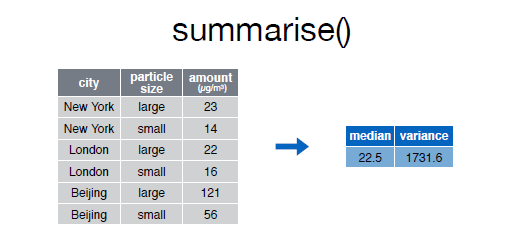

**group_by**

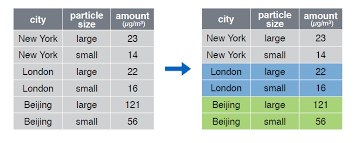

In [ ]:
# group_by() y summarise() ----------------------------------------------------------------
# Ejemplo sencillo
exam2 <- data.frame(
  x = c(1:5),
  y = c(7:11),
  z = c("A", "B", "A", "B", "C")
)
exam2


In [ ]:
# Podemos generar un número de fila por cada grupo



In [ ]:
# 1) Aplicar la función summarise a la columna 'y' y calcular su promedio


# 2) Generar grupos según la variable z. (a diferencia de sql, el comando group_by() no requiere de una medida agregada para que este funcione.)
# select z, avg(x) mean_x, sum(x) tot_x from exam2 group by z



In [ ]:
# 3) Calcular media de x e y en cada valor de z.


In [ ]:
# promedio de retraso de llegada por origen-destino



In [ ]:
# ¿Cuáles son los aeropuertos de destino con mayor retraso medio en su llegada?



In [ ]:
# los podemos remover mediante el argumento na.rm de la función mean()


In [ ]:
# si quisiéramos ratar los NA's, podemos hacerlo de la sgte. manera

#consultamos los NA en arr_delay

# Recordar que NA == NA retorna NA . is.na(NA) retorna TRUE



In [ ]:
# Si queremos reemplazar los NA's por el promedio de arr_delay (?)





In [ ]:
# ¿Cuál es el promedio de arr_delay y distance por cada aeropuerto de destino?¿Cuántos vuelos llegaron acada uno de los destinos?. Ayuda: Recuerde que el conteo se puede determinar de dos maneras: con la función count() o con la función n().





### 4.6 Función sample_n() y sample_frac()

Estas funciones nos permitirán extraer muestras aleatorias de nuestros conjuntos de datos. Esto será de suma importancia cuando trabajemos con modelos de ML.

In [ ]:
# sample_n() y sample_frac()-------------------------------------------------------------

# muestra aleatoria de 100 registros de vuelos

